# k means clustering: iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [3]:
#load iris dataset
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris.data  #features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df=pd.DataFrame(data = iris.data,columns=iris.feature_names)

In [14]:
#add target variable species to the dataframe
df["class"] = iris.target

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## data preprocessing

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [18]:
df.shape

(150, 5)

dataset contains **150 rows** and **5 columns**

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [21]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [23]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [24]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object

In [22]:
df.duplicated().sum()

1

In [25]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
df["class"].unique()

array([0, 1, 2])

In [28]:
df["class"].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

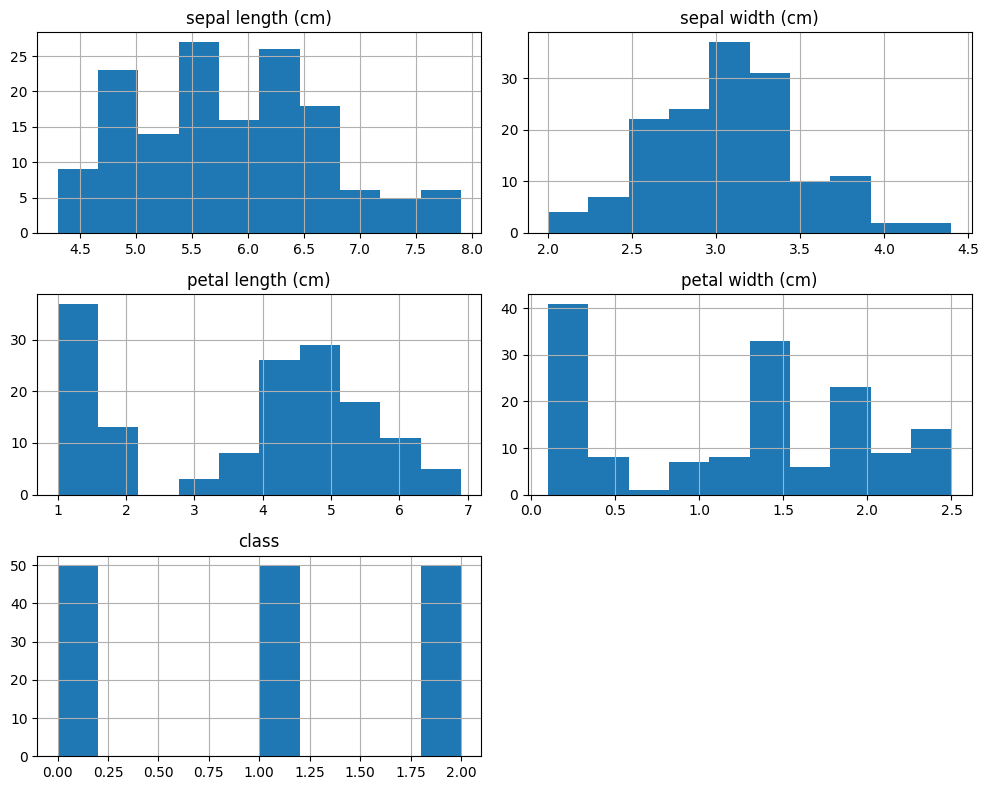

In [29]:
#plot histogram for each feature
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

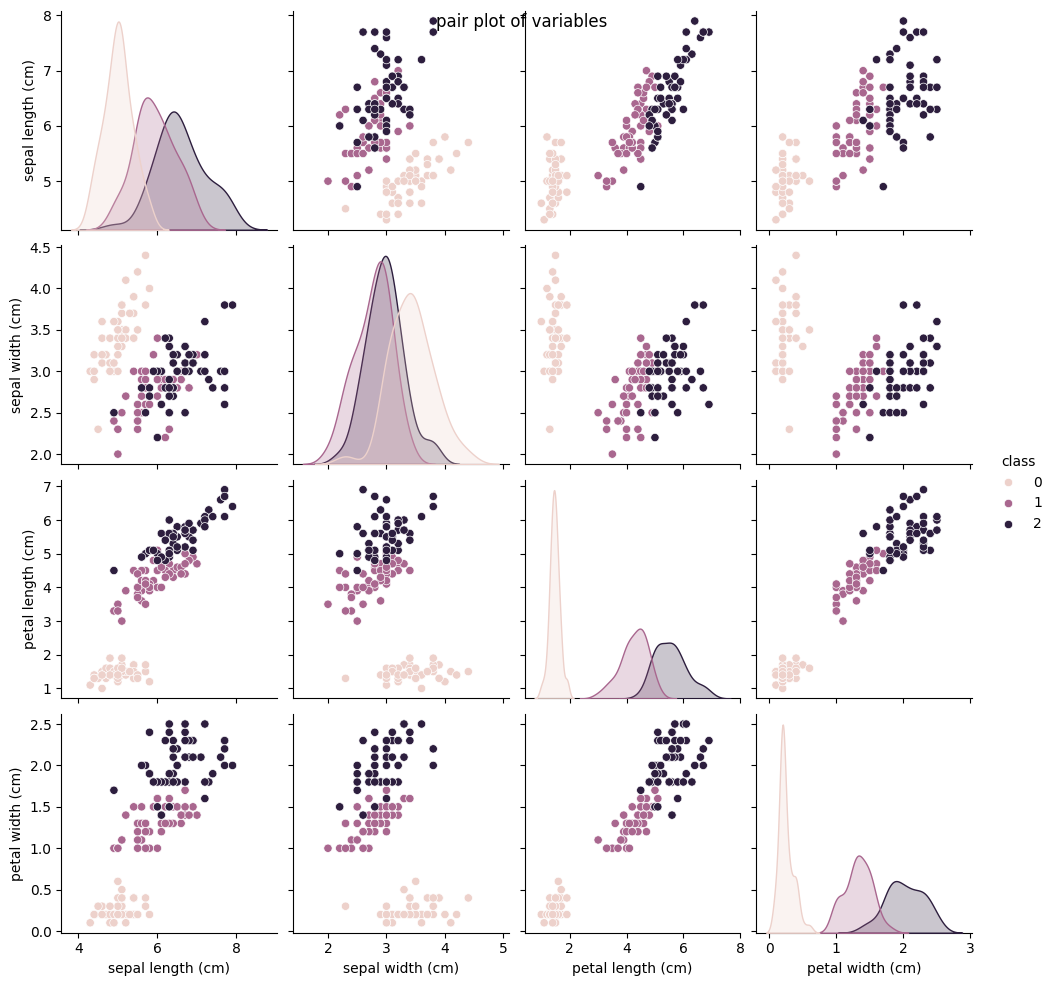

In [31]:
sns.pairplot(df,hue="class")
plt.suptitle("pair plot of variables")
plt.show()

this provide visual overview of relationship between diffrent pairs of variables(features)in the iris dataset.each scatter plot shows the relationship between two variables

In [33]:
col_name=df.select_dtypes("float64").columns
col_name

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

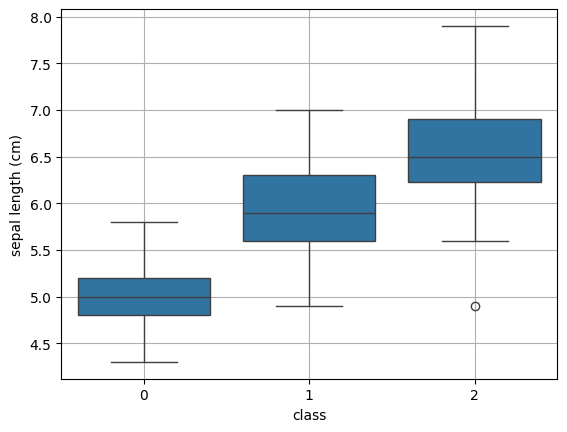

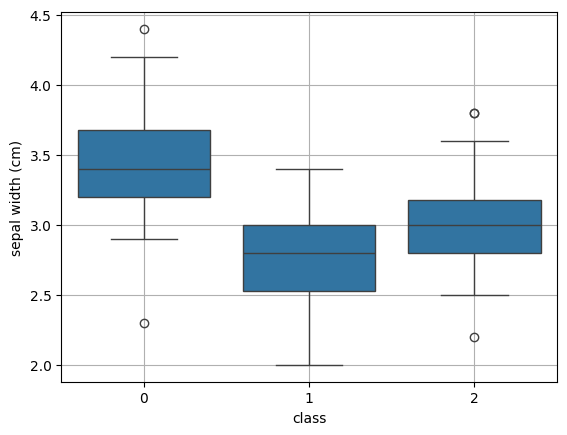

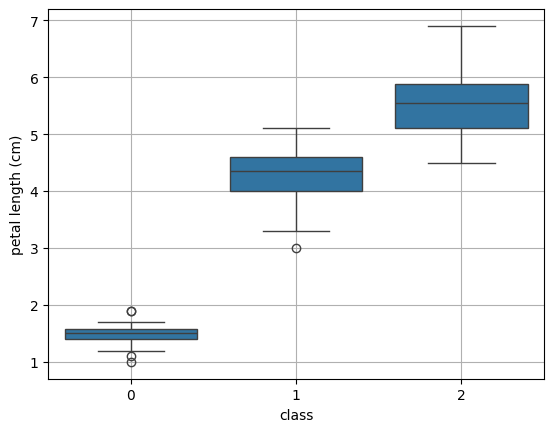

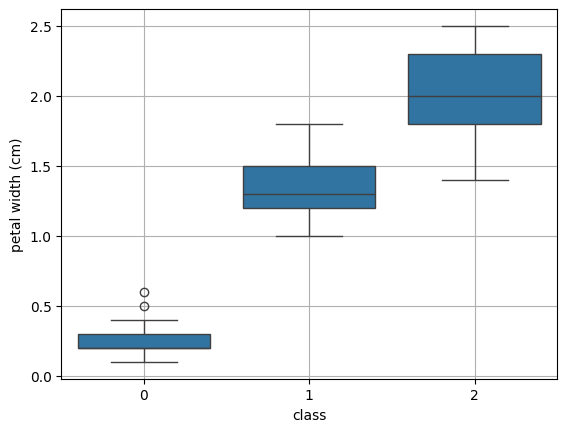

In [34]:
for col in df[col_name]:
    plt.figure()
    sns.boxplot(data=df,x="class",y=df[col])
    plt.grid()
    plt.show()

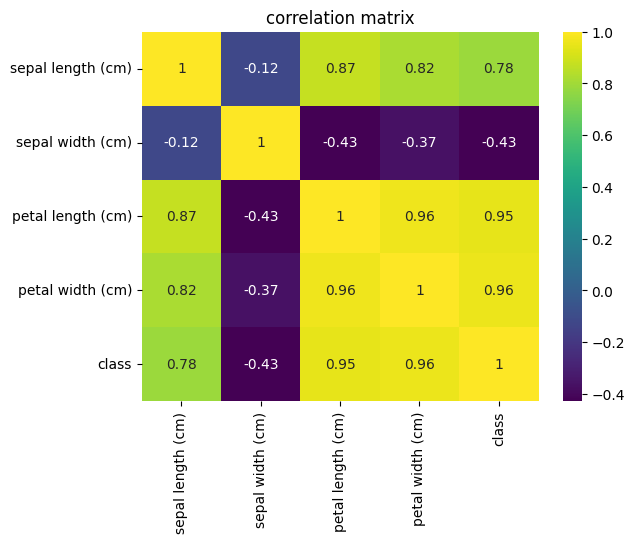

In [36]:
#correlatrion matrics
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="viridis")
plt.title("correlation matrix")
plt.show()

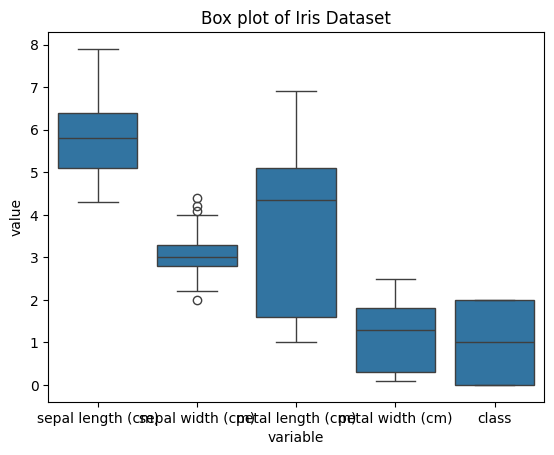

In [37]:
sns.boxplot(x='variable',y='value',data=pd.melt(df))

plt.title('Box plot of Iris Dataset')
plt.xlabel('variable')
plt.ylabel('value')
plt.show()

In [47]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [48]:
for i in df.select_dtypes(include='number').columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

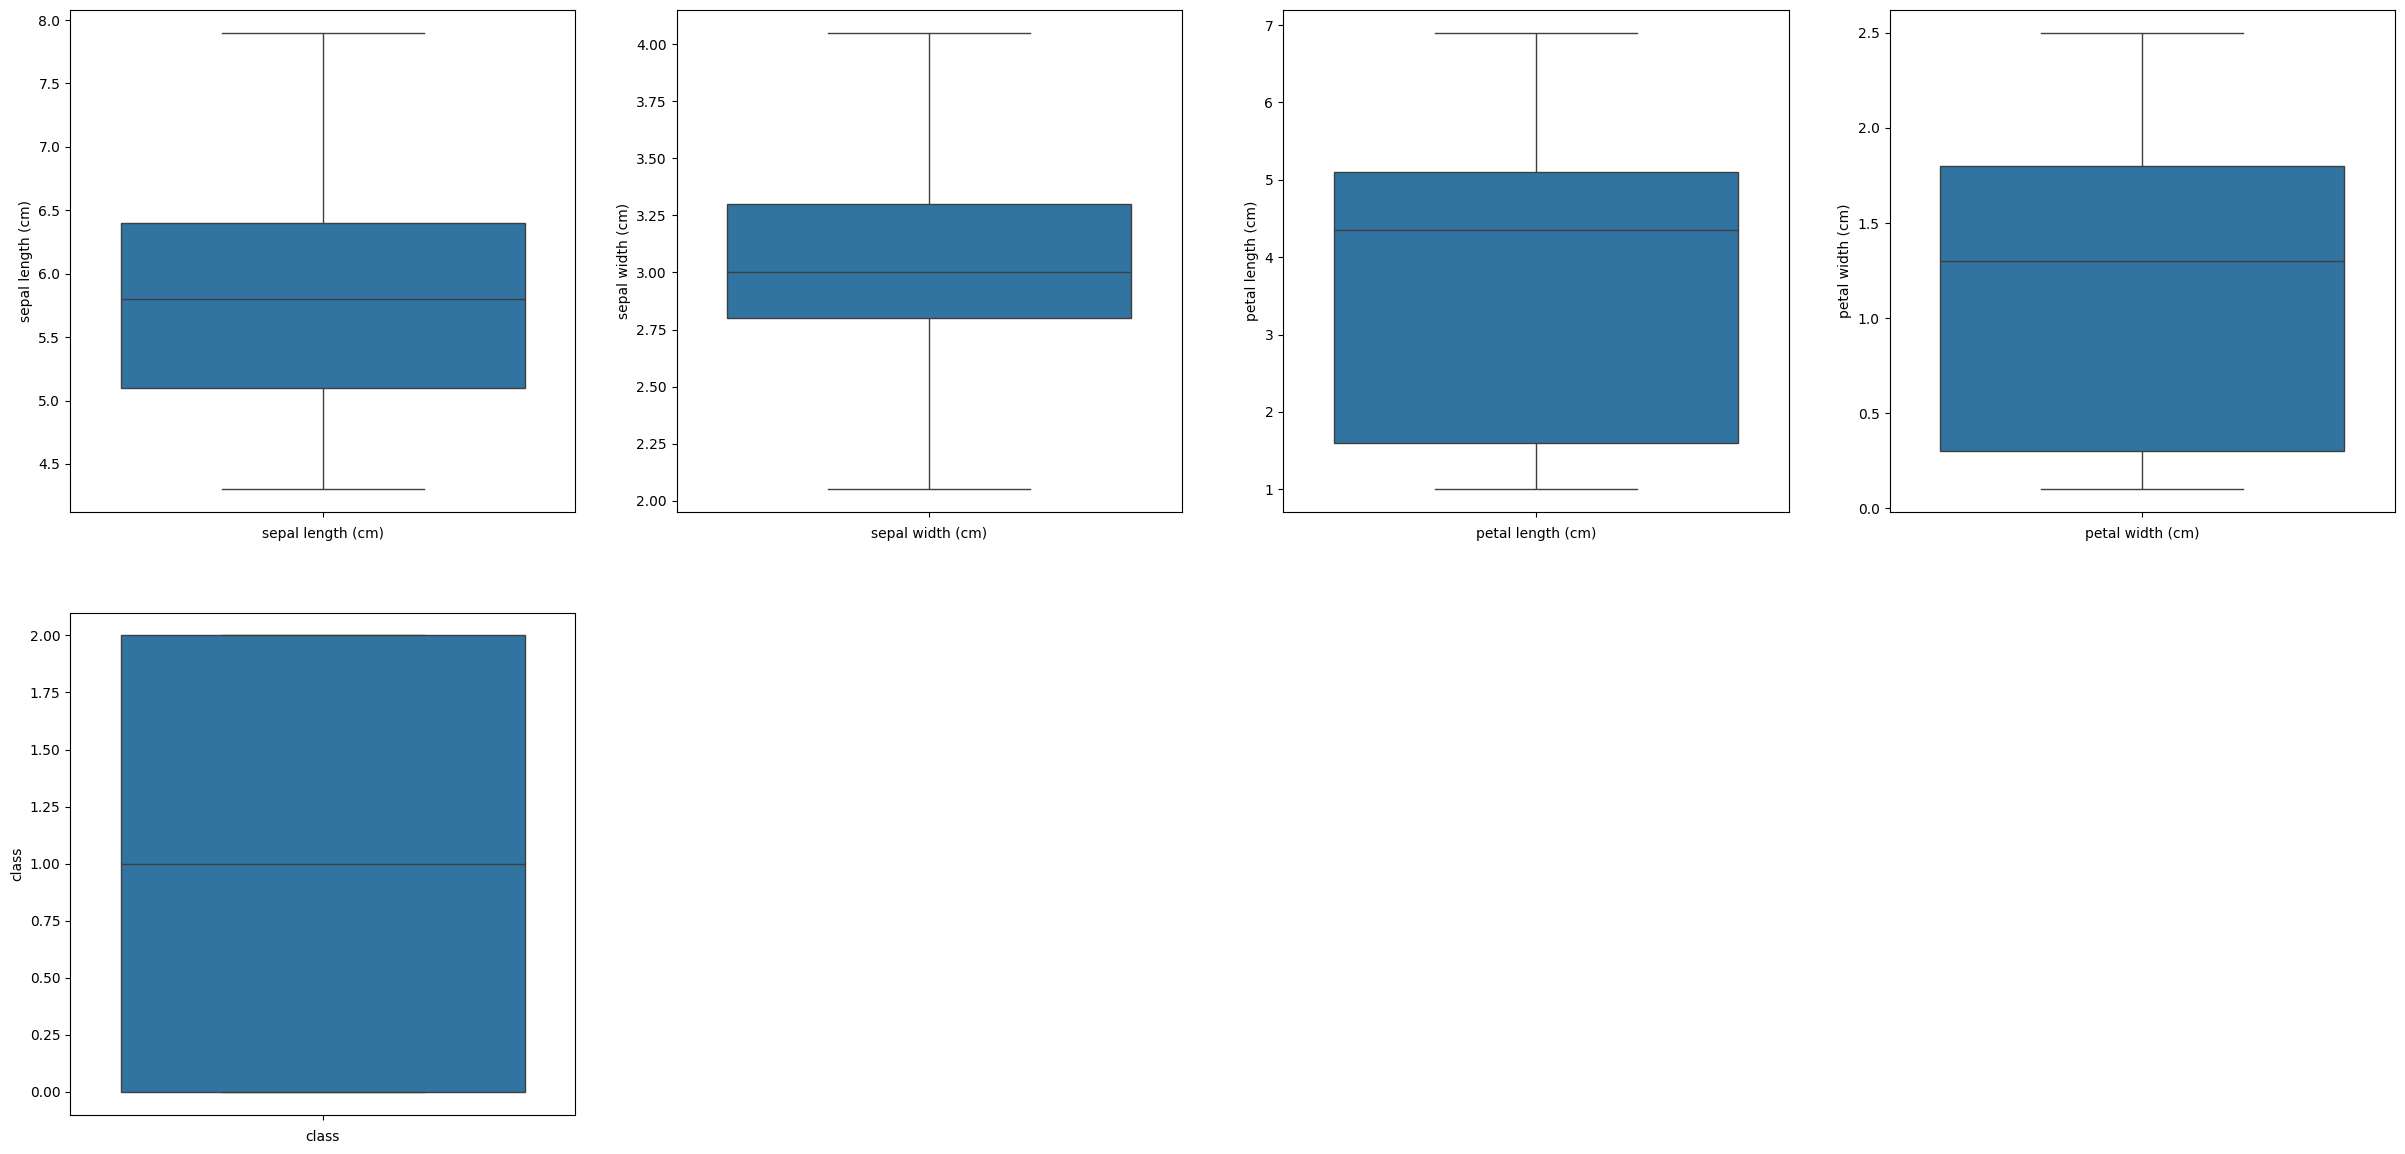

In [49]:
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include = 'number').columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

## feature scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

#Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col_name])

#convert scaled datato datadrame
scaled_df = pd.DataFrame(df_scaled, columns=col_name)

df[col_name] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667,2.0
146,0.555556,0.225,0.677966,0.750000,2.0
147,0.611111,0.475,0.711864,0.791667,2.0
148,0.527778,0.675,0.745763,0.916667,2.0


In [52]:
clean_df=df.drop("class",axis=1)
clean_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667
146,0.555556,0.225,0.677966,0.750000
147,0.611111,0.475,0.711864,0.791667
148,0.527778,0.675,0.745763,0.916667


In [55]:
clustered_data = clean_df.iloc[:,[0,1,2,3]]
clustered_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667


**elbow plot**

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustered_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([42.99236227, 13.27235533,  7.90492421,  6.32138807,  5.14784776,
        4.49130012,  4.70991042,  3.54470253,  3.16976894,  2.94203958])

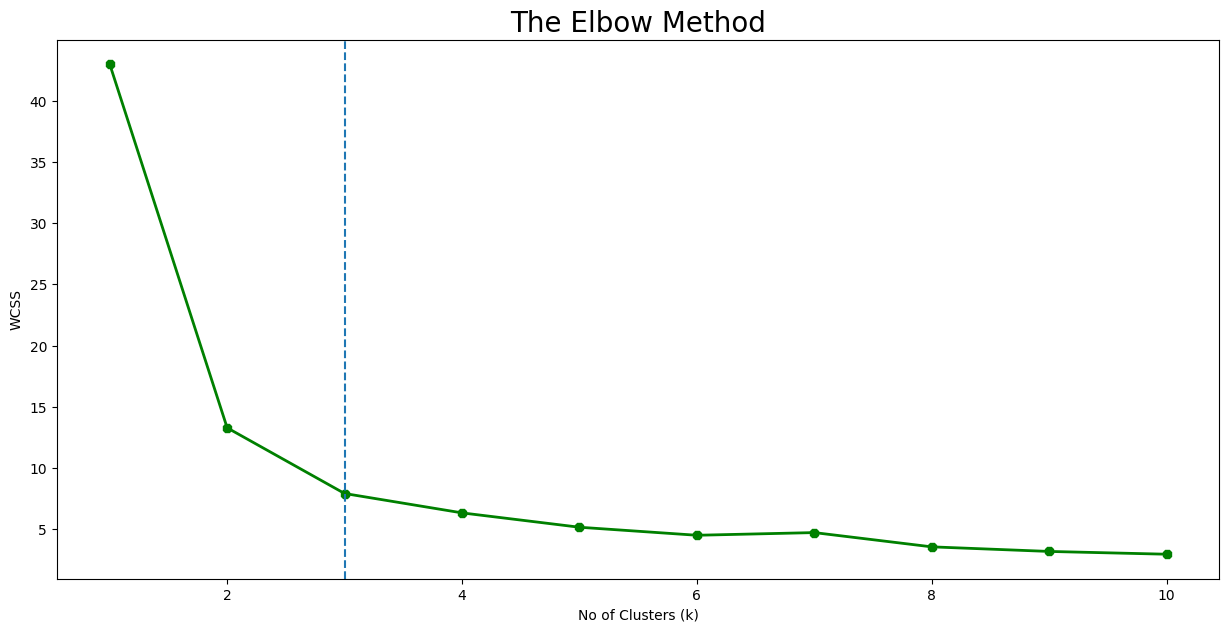

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss,linewidth = 2, color = 'green',marker = '8')
plt.axvline(x=3,ls='--')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

**the optimal number of cluster are 3 inthis datast.the slope of the curve is not steep through after it**

In [58]:
km = KMeans(n_clusters = 3)
km.fit(clustered_data)

KMeans(n_clusters=3)

In [59]:
clusters = clustered_data.copy()
clusters['Cluster_Prediction'] = km.fit_predict(clustered_data)
clusters.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_Prediction
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


In [60]:
km.cluster_centers_

array([[0.44125683, 0.3442623 , 0.57571548, 0.54918033],
       [0.19611111, 0.6835    , 0.07830508, 0.06083333],
       [0.70726496, 0.51602564, 0.79704476, 0.82478632]])

## SILHOUTTE COEFFICIENT:
WE can check quality of clustering by silhoutte score.a higher silhoutte score indicates better clustering.we can use the silhoutte score to evaluate the quality of clustering.the silhoutte score measures how silmiliar ana object is to its own cluster(cohesion) compared to other clusters(seperation) a higher silhoutte score indicates better clustering

In [61]:
from sklearn.metrics import silhouette_score
s=[]
k_rng = range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(clustered_data)
    s.append(silhouette_score(clustered_data,km_pred))
s

[0.621372977569765,
 0.4806656975116473,
 0.4351401590898932,
 0.3537216960697951,
 0.3813451454388631,
 0.3141010938554796,
 0.3554136334684682,
 0.35529480321673323,
 0.34141664317035925]

In [63]:
silhouette_score(clustered_data,km_pred)


0.34141664317035925

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

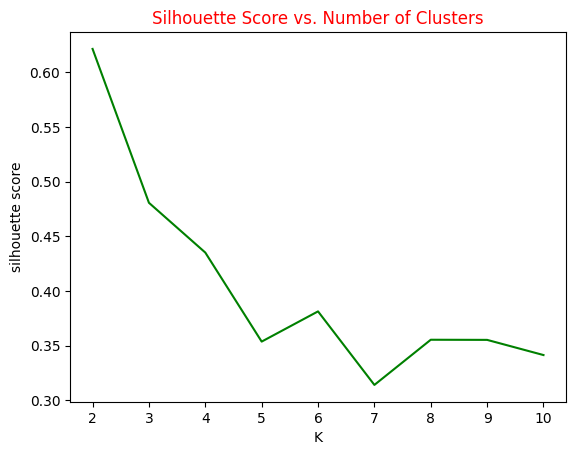

In [64]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s,color='green')
plt.title('Silhouette Score vs. Number of Clusters',color='red')

In [66]:
optimalkmeans = KMeans(n_clusters = 2,init = 'k-means++', max_iter = 300,n_init = 10, random_state = 0)
y_kmeansbest = optimalkmeans.fit_predict(clustered_data)

In [67]:
silhouette_score(clustered_data, y_kmeansbest)

0.621372977569765

# hierarchial clustering

In [69]:
import scipy.cluster.hierarchy as shc


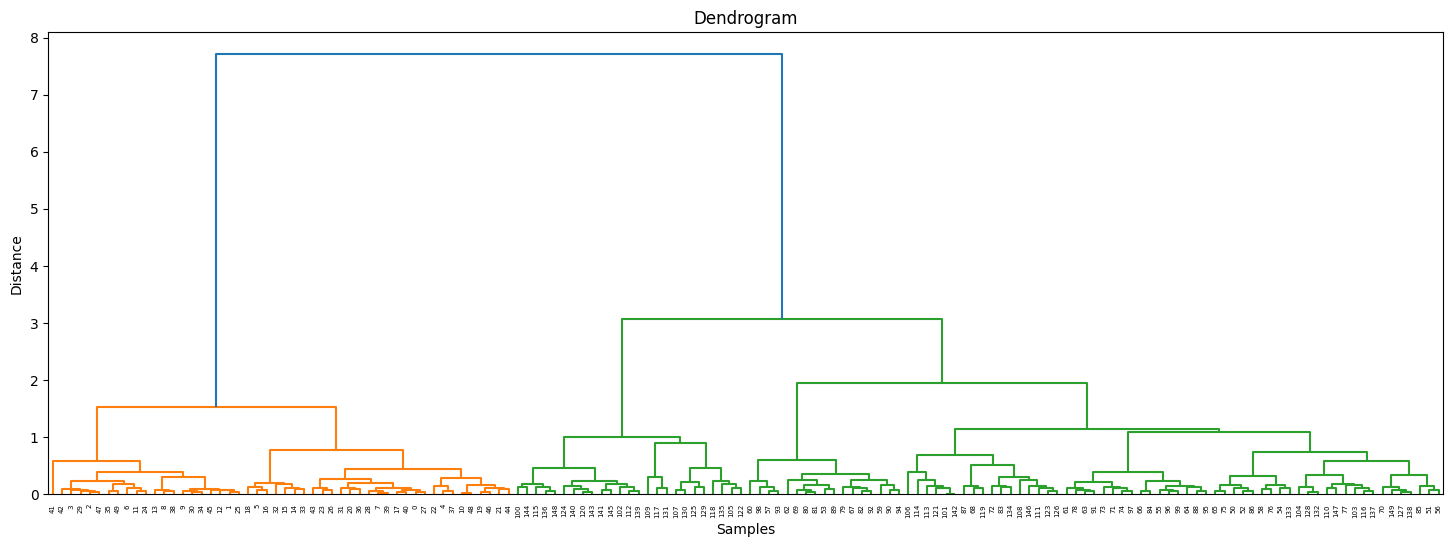

In [70]:
plt.figure(figsize=(18, 6))
# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(clustered_data, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# SELECT THRESHOLD VAOUE AND DRAW HORIZONTAL LINE

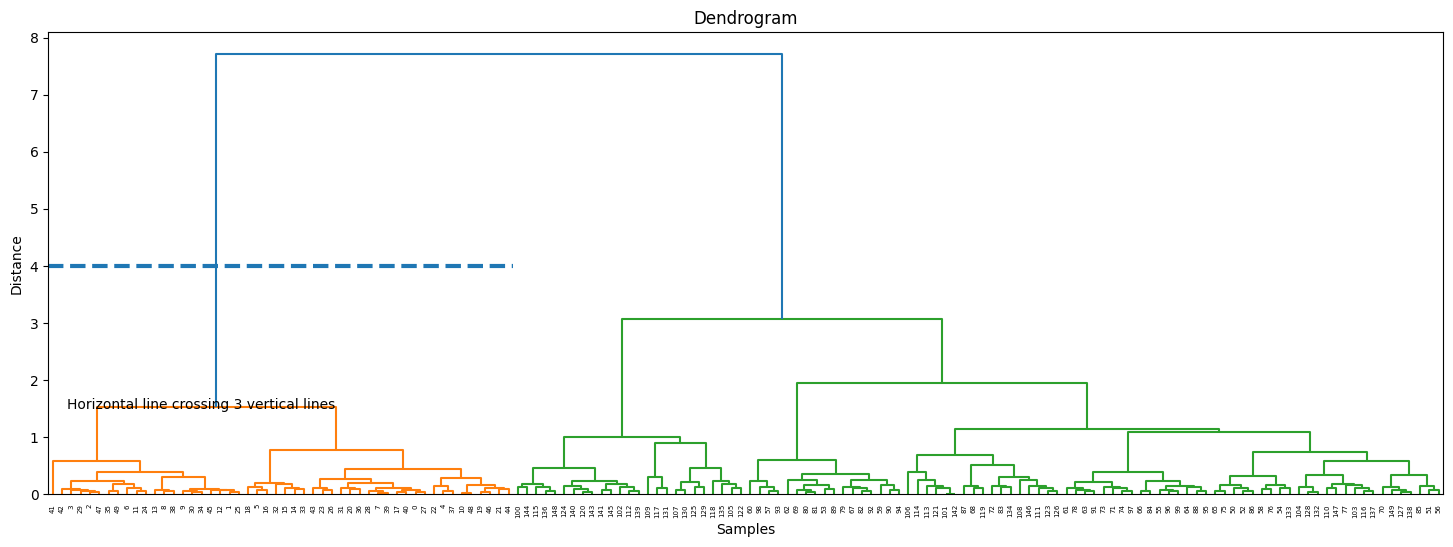

In [72]:
plt.figure(figsize=(18, 6))
dendro = shc.dendrogram(shc.linkage(clustered_data, method="ward"))
plt.hlines(y=4,xmin=0,xmax=500,lw=3,linestyles='--')
plt.text(x=20,y=1.5,s='Horizontal line crossing 3 vertical lines')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## aglomerative clustering**

In [74]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(clustered_data)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
clean_df['cluster']=hc_pred
clean_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


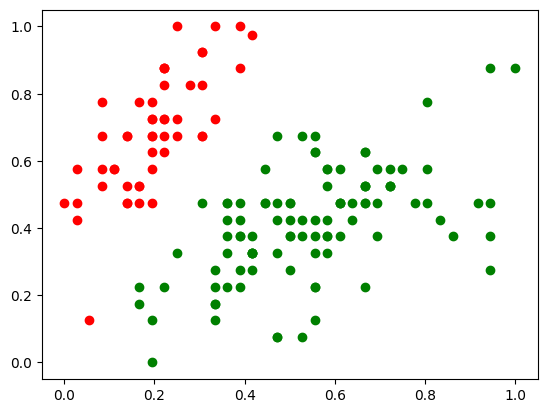

In [78]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = clean_df[clean_df['cluster'] == 0]
df2 = clean_df[clean_df['cluster'] == 1]
df3 = clean_df[clean_df['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

## conclusion::

in kmeans clustering silhoutte score is 0.6213 ,it is comparativly high silhouette score and well seperated clusters.while in hierarchial clustering the silhouette score is about 0.3150 produce low score compared to kmeans.